In [1]:
# load packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
data = pd.read_csv("data/house-price-dataset.csv")
data.shape, data.columns

((21613, 21),
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'lat', 'long', 'sqft_living15', 'sqft_lot15'],
       dtype='object'))

In [3]:
# display all columns
pd.set_option('display.max_columns', 100) # max 100 columns

In [4]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# get dates
data["sale_year"] = pd.to_numeric(data.date.apply(lambda x: str(x)[:4]))
data["sale_month"] = pd.to_numeric(data.date.apply(lambda x: str(x)[4:6]))
data["sale_day"] = pd.to_numeric(data.date.apply(lambda x: str(x)[6:8]))

data = pd.DataFrame(data, columns=[
    "sale_year", "sale_month", "sale_day",
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "condition", "grade", "sqft_above", "sqft_basement", "yr_built",
    "zipcode", "lat", "long", "sqft_living15", "sqft_lot15", "price"
])

label_col = "price"

In [7]:
data.head(5)

,sale_year,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014,10,13,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,221900.0
1,2014,12,9,3,2.25,2570,7242,2.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,538000.0
2,2015,2,25,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,180000.0
3,2014,12,9,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,604000.0
4,2015,2,18,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,510000.0


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data[[col for col in data.columns if col != "price"]], data[["price"]], test_size=0.3)

In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15129, 18), (15129, 1), (6484, 18), (6484, 1))

## Neural Regression Model

In [11]:
# initiate sequential model
baseline_model = tf.keras.Sequential()
baseline_model.add(tf.keras.layers.Dense(units=64, activation="tanh", input_shape=(x_train.shape[1], ))) # input layer

baseline_model.add(tf.keras.layers.Dense(units=128, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # first hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% of nodes

baseline_model.add(tf.keras.layers.Dense(units=32, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% of nodes

baseline_model.add(tf.keras.layers.Dense(units=16, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% of nodes

baseline_model.add(tf.keras.layers.Dense(units=32, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% of nodes

baseline_model.add(tf.keras.layers.Dense(units=8, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer

baseline_model.add(tf.keras.layers.Dense(units=1))

baseline_model.compile(
    optimizer="rmsprop",
    loss="mean_squared_error",
    metrics=["mean_absolute_error"]
)

history = baseline_model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=1000,
    shuffle=True,
    verbose=True,
    validation_data=(x_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="mean_absolute_error", patience=50, verbose=1, mode="auto")]
)

Train on 15129 samples, validate on 6484 samples
Epoch 1/1000
15129/15129 [==============================] - 1s 69us/step - loss: 435165977543.7542 - mean_absolute_error: 541296.3575 - val_loss: 394904276473.9988 - val_mean_absolute_error: 526621.0152
Epoch 2/1000
15129/15129 [==============================] - 0s 20us/step - loss: 366287829595.3404 - mean_absolute_error: 469268.5153 - val_loss: 213523894441.2980 - val_mean_absolute_error: 313679.3503
Epoch 3/1000
15129/15129 [==============================] - 0s 20us/step - loss: 172740216949.9065 - mean_absolute_error: 257982.5352 - val_loss: 120777918033.1746 - val_mean_absolute_error: 230703.7339
Epoch 4/1000
15129/15129 [==============================] - 0s 20us/step - loss: 156824359082.8359 - mean_absolute_error: 250108.2735 - val_loss: 120688946444.4763 - val_mean_absolute_error: 225927.6542
Epoch 5/1000
15129/15129 [==============================] - 0s 20us/step - loss: 157981527155.6729 - mean_absolute_error: 250365.6405 - val

Epoch 41/1000
15129/15129 [==============================] - 0s 20us/step - loss: 150835930976.6705 - mean_absolute_error: 243660.3894 - val_loss: 116119646306.5466 - val_mean_absolute_error: 222808.9648
Epoch 42/1000
15129/15129 [==============================] - 0s 20us/step - loss: 151023629300.8321 - mean_absolute_error: 243761.6232 - val_loss: 117390187988.0962 - val_mean_absolute_error: 217519.8105
Epoch 43/1000
15129/15129 [==============================] - 0s 20us/step - loss: 150302234988.5491 - mean_absolute_error: 243429.3673 - val_loss: 117208343331.5336 - val_mean_absolute_error: 217892.6381
Epoch 44/1000
15129/15129 [==============================] - 0s 20us/step - loss: 152302298799.6076 - mean_absolute_error: 244746.7682 - val_loss: 116490257086.4602 - val_mean_absolute_error: 220106.9386
Epoch 45/1000
15129/15129 [==============================] - 0s 23us/step - loss: 150224159249.5641 - mean_absolute_error: 243732.1332 - val_loss: 116743050123.1339 - val_mean_absolute

15129/15129 [==============================] - 0s 20us/step - loss: 148303932450.4514 - mean_absolute_error: 243052.1561 - val_loss: 117059156671.7236 - val_mean_absolute_error: 217752.5665
Epoch 82/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147879470923.5529 - mean_absolute_error: 242348.1626 - val_loss: 118403082243.7903 - val_mean_absolute_error: 215538.8421
Epoch 83/1000
15129/15129 [==============================] - 0s 20us/step - loss: 148947529594.2553 - mean_absolute_error: 241561.2501 - val_loss: 119435946508.3183 - val_mean_absolute_error: 214568.2332
Epoch 84/1000
15129/15129 [==============================] - 0s 20us/step - loss: 149341439012.2113 - mean_absolute_error: 242702.6157 - val_loss: 118065653283.6915 - val_mean_absolute_error: 215952.9290
Epoch 85/1000
15129/15129 [==============================] - 0s 19us/step - loss: 148874565702.5273 - mean_absolute_error: 242201.3801 - val_loss: 116505716547.7508 - val_mean_absolute_error: 219306

15129/15129 [==============================] - 0s 20us/step - loss: 147724135533.7167 - mean_absolute_error: 241327.7954 - val_loss: 117760845292.1012 - val_mean_absolute_error: 216341.2055
Epoch 122/1000
15129/15129 [==============================] - 0s 20us/step - loss: 148529415444.0854 - mean_absolute_error: 242040.5047 - val_loss: 120526778982.0210 - val_mean_absolute_error: 213917.2769
Epoch 123/1000
15129/15129 [==============================] - 0s 20us/step - loss: 148211450708.2842 - mean_absolute_error: 241497.3458 - val_loss: 119882706552.3405 - val_mean_absolute_error: 214227.5823
Epoch 124/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147810474368.5838 - mean_absolute_error: 241101.8596 - val_loss: 120101558328.8538 - val_mean_absolute_error: 214113.1173
Epoch 125/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147292692415.5643 - mean_absolute_error: 241160.5931 - val_loss: 117397698677.4978 - val_mean_absolute_error: 21

15129/15129 [==============================] - 0s 20us/step - loss: 147194396530.1331 - mean_absolute_error: 241242.1793 - val_loss: 116353877539.6915 - val_mean_absolute_error: 219616.9865
Epoch 162/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147158302349.6300 - mean_absolute_error: 241243.2938 - val_loss: 117663277485.5620 - val_mean_absolute_error: 216438.5761
Epoch 163/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147030019095.6219 - mean_absolute_error: 241695.5982 - val_loss: 120238941681.1548 - val_mean_absolute_error: 214012.4373
Epoch 164/1000
15129/15129 [==============================] - 0s 20us/step - loss: 146594312995.0099 - mean_absolute_error: 240749.4091 - val_loss: 123120275135.0919 - val_mean_absolute_error: 213556.0623
Epoch 165/1000
15129/15129 [==============================] - 0s 20us/step - loss: 148167848454.7346 - mean_absolute_error: 240911.0218 - val_loss: 120404426448.7798 - val_mean_absolute_error: 21

15129/15129 [==============================] - 0s 20us/step - loss: 147580138965.6633 - mean_absolute_error: 240991.5932 - val_loss: 119010439347.4053 - val_mean_absolute_error: 214824.4037
Epoch 202/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147745656922.1559 - mean_absolute_error: 242225.0108 - val_loss: 120305919331.6521 - val_mean_absolute_error: 213979.6144
Epoch 203/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147323309863.6801 - mean_absolute_error: 240487.6810 - val_loss: 126717230088.2122 - val_mean_absolute_error: 214494.4625
Epoch 204/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147841065448.4119 - mean_absolute_error: 241348.3487 - val_loss: 121293136453.1721 - val_mean_absolute_error: 213643.0417
Epoch 205/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147310494966.3042 - mean_absolute_error: 240620.0091 - val_loss: 117375472639.3683 - val_mean_absolute_error: 21

15129/15129 [==============================] - 0s 20us/step - loss: 146725458391.8969 - mean_absolute_error: 239993.1717 - val_loss: 119876781851.3214 - val_mean_absolute_error: 214203.8119
Epoch 242/1000
15129/15129 [==============================] - 0s 20us/step - loss: 146099393558.4036 - mean_absolute_error: 239212.7874 - val_loss: 118975846669.1080 - val_mean_absolute_error: 214858.3415
Epoch 243/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147612862173.0917 - mean_absolute_error: 240083.9580 - val_loss: 121895037614.0358 - val_mean_absolute_error: 213562.0078
Epoch 244/1000
15129/15129 [==============================] - 0s 20us/step - loss: 146586354623.4966 - mean_absolute_error: 239996.5704 - val_loss: 119513287160.1036 - val_mean_absolute_error: 214434.7507
Epoch 245/1000
15129/15129 [==============================] - 0s 20us/step - loss: 146864570738.3700 - mean_absolute_error: 240053.0197 - val_loss: 116708379345.4115 - val_mean_absolute_error: 21

15129/15129 [==============================] - 0s 20us/step - loss: 145788193683.2309 - mean_absolute_error: 239780.2712 - val_loss: 121769346838.2677 - val_mean_absolute_error: 213580.7002
Epoch 282/1000
15129/15129 [==============================] - 0s 20us/step - loss: 145781897526.6722 - mean_absolute_error: 239709.4238 - val_loss: 119791386078.2036 - val_mean_absolute_error: 214260.2983
Epoch 283/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147469271197.0282 - mean_absolute_error: 241085.9546 - val_loss: 120715922200.1629 - val_mean_absolute_error: 213821.4151
Epoch 284/1000
15129/15129 [==============================] - 0s 20us/step - loss: 147082550551.4696 - mean_absolute_error: 239790.6178 - val_loss: 120841131735.0969 - val_mean_absolute_error: 213777.2810
Epoch 285/1000
15129/15129 [==============================] - 0s 20us/step - loss: 145836362586.1051 - mean_absolute_error: 239094.5091 - val_loss: 120951183472.4442 - val_mean_absolute_error: 21

In [12]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [13]:
# accumulate data
train_mae, test_mae = history.history["mean_absolute_error"], history.history["val_mean_absolute_error"]
loss, val_loss = history.history["loss"], history.history["val_loss"]

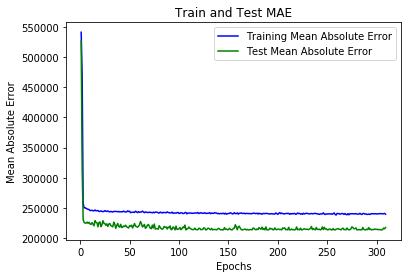

In [14]:
# plot MAE ve Epochs
epochs = range(1, len(loss) + 1)
plt.plot(epochs, train_mae, "b", label="Training Mean Absolute Error", color="blue")
plt.plot(epochs, test_mae, "b", label="Test Mean Absolute Error", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Train and Test MAE")
plt.show()

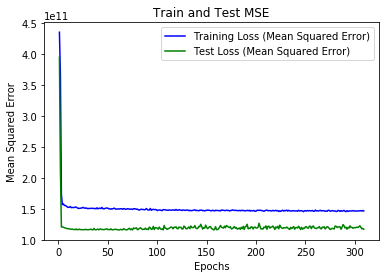

In [15]:
# plot mSE vs Epochs
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "b", label="Training Loss (Mean Squared Error)", color="blue")
plt.plot(epochs, val_loss, "b", label="Test Loss (Mean Squared Error)", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Train and Test MSE")
plt.show()